In [19]:
import xarray as xr
import numpy as np

In [9]:
import glob
glob.glob('input/smant/sma*.nc')

['input/smant\\smand_m_wld_20230101_20230311_t.nc',
 'input/smant\\smant_m_wld_20010101_20011221_t.nc',
 'input/smant\\smant_m_wld_20020101_20021221_t.nc',
 'input/smant\\smant_m_wld_20030101_20031221_t.nc',
 'input/smant\\smant_m_wld_20040101_20041221_t.nc',
 'input/smant\\smant_m_wld_20050101_20051221_t.nc',
 'input/smant\\smant_m_wld_20060101_20061221_t.nc',
 'input/smant\\smant_m_wld_20070101_20071221_t.nc',
 'input/smant\\smant_m_wld_20080101_20081221_t.nc',
 'input/smant\\smant_m_wld_20090101_20091221_t.nc',
 'input/smant\\smant_m_wld_20100101_20101221_t.nc',
 'input/smant\\smant_m_wld_20110101_20111221_t.nc',
 'input/smant\\smant_m_wld_20120101_20121221_t.nc',
 'input/smant\\smant_m_wld_20130101_20131221_t.nc',
 'input/smant\\smant_m_wld_20140101_20141221_t.nc',
 'input/smant\\smant_m_wld_20150101_20151221_t.nc',
 'input/smant\\smant_m_wld_20160101_20161221_t.nc',
 'input/smant\\smant_m_wld_20170101_20171221_t.nc',
 'input/smant\\smant_m_wld_20180101_20181221_t.nc',
 'input/sman

In [14]:
import glob
dses = [xr.open_dataset(fname).sel(lat=52,lon=1,method='nearest') for fname in glob.glob('input/smant/sman*.nc')]

In [15]:
ds = xr.merge(dses)

In [21]:
 df[np.isnan(df.smant) & !np.isnan] 

,smand,smant
time,,
2003-01-21,NaN,NaN
2010-01-01,NaN,NaN
2010-01-11,NaN,NaN
2010-01-21,NaN,NaN
2010-12-01,NaN,NaN
2010-12-11,NaN,NaN
2010-12-21,NaN,NaN
2023-01-01,0.19,NaN
2023-01-11,0.23,NaN


In [20]:
df = ds.drop_vars(['lat','lon','4326']).to_dataframe()

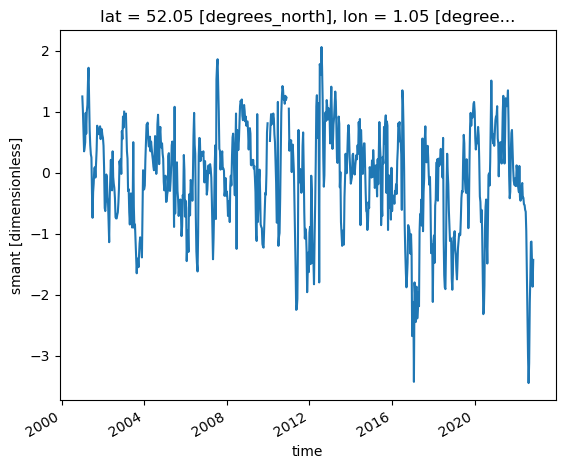

In [28]:
ds.smant.plot()

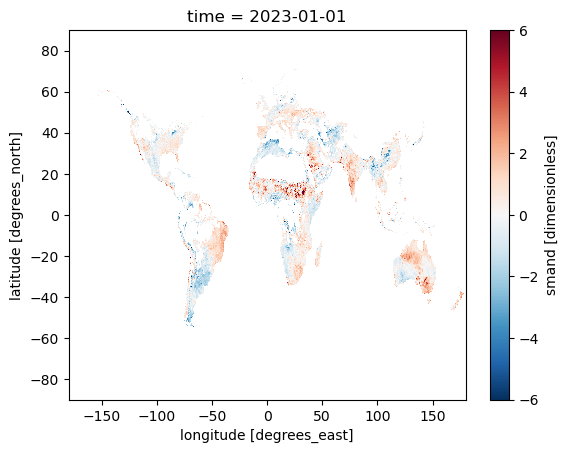

In [11]:
ds.isel(time=0).smand.plot()